# Neural Network Modelling

In 3.Modelling_and_Hyperparamter_Tuning, I experimented with different classifcation and ensemble methods to help classify hotel review scores. Some performed well, but there was definitely room for improvement, so I wanted to explore a deep learning approach. 

In this notebook, I followed a different preprocessing routine than I did with the earlier modelling. In the neural network model I kept the stop words for context.

## Imports

In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.preprocessing import sequence
from tensorflow.python.keras import Sequential
from keras.models import load_model
from tensorflow.python.keras.layers import Dense, Embedding, GlobalAveragePooling1D

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from sklearn.metrics import confusion_matrix

import pickle

In [3]:
sns.set_context('poster')

In [ ]:
# import zipped data
from zipfile import ZipFile 

data = "data.zip"

In [5]:
#Unzip data
!unzip -q data.zip

replace data/sentiment_dataset_dev.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [113]:
# Load Dataset to the Dataframe
df_train = pd.read_csv('./data/sentiment_dataset_train.csv')
df_dev = pd.read_csv('./data/sentiment_dataset_dev.csv')
df_test = pd.read_csv('./data/sentiment_dataset_test.csv')

In [114]:
df_train.shape, df_dev.shape, df_test.shape

((35005, 3), (7499, 3), (6500, 2))

In [115]:
df_train.rating.unique()

array(['4', '2', '3', '1', '5',
       'Tables not made up prior to guest seating. 2.'], dtype=object)

In [116]:
df_train.drop(df_train.index[df_train['rating'] == 'Tables not made up prior to guest seating. 2.'], inplace = True)

In [117]:
df_train.rating.unique()

array(['4', '2', '3', '1', '5'], dtype=object)

## One Hot Encoding Scores Column

For multi-class classifcation using the neural network model, I needed the target variable to be one hot encoded, as the output layer would have 5 nodes, 1 for each score.

In [118]:
# Training Dataset
enc = OneHotEncoder(handle_unknown='ignore')

enc_df = pd.DataFrame(enc.fit_transform(df_train[['rating']]).toarray())

df_train = df_train.join(enc_df)
df_train.head()

id                                             review rating  ...    2    3    4
0   0  Arrived about 10pm and check in was painless. ...      4  ...  0.0  1.0  0.0
1   1  I checked in at 4pm even tough room was not re...      2  ...  0.0  0.0  0.0
2   2  I chose this hotel, as it was in a good locati...      2  ...  0.0  0.0  0.0
3   3  Great location, super close to shops & a 10min...      4  ...  0.0  1.0  0.0
4   4  I was in the Sir Adam Hotel to visit a friend....      3  ...  1.0  0.0  0.0

[5 rows x 8 columns]

In [119]:
# Training Dataset
df_train = df_train.rename(columns={0: 'rating_1', 1:'rating_2',2:'rating_3',3:'rating_4',4:'rating_5'})

In [120]:
df_train.head()

id                                             review  ... rating_4  rating_5
0   0  Arrived about 10pm and check in was painless. ...  ...      1.0       0.0
1   1  I checked in at 4pm even tough room was not re...  ...      0.0       0.0
2   2  I chose this hotel, as it was in a good locati...  ...      0.0       0.0
3   3  Great location, super close to shops & a 10min...  ...      1.0       0.0
4   4  I was in the Sir Adam Hotel to visit a friend....  ...      0.0       0.0

[5 rows x 8 columns]

In [121]:
# Training Dataset
enc = OneHotEncoder(handle_unknown='ignore')

enc_df = pd.DataFrame(enc.fit_transform(df_dev[['rating']]).toarray())

df_dev = df_dev.join(enc_df)
df_dev.head()

id                                             review  rating  ...    2    3    4
0   0  The hotel position is very good, center of the...       2  ...  0.0  0.0  0.0
1   1  Not a very big room but very comfortable and c...       4  ...  0.0  1.0  0.0
2   2  The hotel is located near Kurfürstendamm in a ...       4  ...  0.0  1.0  0.0
3   3  My booking was for 2 rooms and I have made the...       2  ...  0.0  0.0  0.0
4   4  Excellent hotel, fantastic swimming pool, very...       5  ...  0.0  0.0  1.0

[5 rows x 8 columns]

In [123]:
# Training Dataset
df_dev = df_dev.rename(columns={0: 'rating_1', 1:'rating_2',2:'rating_3',3:'rating_4',4:'rating_5'})
df_dev.head()

id                                             review  ...  rating_4  rating_5
0   0  The hotel position is very good, center of the...  ...       0.0       0.0
1   1  Not a very big room but very comfortable and c...  ...       1.0       0.0
2   2  The hotel is located near Kurfürstendamm in a ...  ...       1.0       0.0
3   3  My booking was for 2 rooms and I have made the...  ...       0.0       0.0
4   4  Excellent hotel, fantastic swimming pool, very...  ...       0.0       1.0

[5 rows x 8 columns]

## Assining Training, Development & Test Data

Assign training, development and test data to their respective x and y. 

In [131]:
x_train, y_train = (df_train[['review']], df_train[['rating_1','rating_2','rating_3','rating_4','rating_5']])
x_test, y_test = (df_dev[['review']], df_dev[['rating_1','rating_2','rating_3','rating_4','rating_5']])
X_test = (df_dev[['review']])

In [132]:
x_train.head()

review
0  Arrived about 10pm and check in was painless. ...
1  I checked in at 4pm even tough room was not re...
2  I chose this hotel, as it was in a good locati...
3  Great location, super close to shops & a 10min...
4  I was in the Sir Adam Hotel to visit a friend....

In [63]:
y_test.to_csv('/content/y_test_data_ohe.csv',index=False)

In [133]:
y_test.head()

rating_1  rating_2  rating_3  rating_4  rating_5
0       0.0       1.0       0.0       0.0       0.0
1       0.0       0.0       0.0       1.0       0.0
2       0.0       0.0       0.0       1.0       0.0
3       0.0       1.0       0.0       0.0       0.0
4       0.0       0.0       0.0       0.0       1.0

## Removing Punctuation and Tokenizing Review Column

In [134]:
tokenizer = RegexpTokenizer(r'[a-zA-Z]+')

In [135]:
def text_cleanup(text):
  
  token_list = tokenizer.tokenize(text.lower())
  new_text = ''
  for word in token_list:
    new_text += word + ' '
        
  return new_text

In [136]:
x_train['review_cleaned'] = x_train['review'].apply(text_cleanup)
x_test['review_cleaned'] = x_test['review'].apply(text_cleanup)
X_test['review_cleaned'] = X_test['review'].apply(text_cleanup)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [140]:
x_train.head()

review                                     review_cleaned
0  Arrived about 10pm and check in was painless. ...  arrived about pm and check in was painless the...
1  I checked in at 4pm even tough room was not re...  i checked in at pm even tough room was not rea...
2  I chose this hotel, as it was in a good locati...  i chose this hotel as it was in a good locatio...
3  Great location, super close to shops & a 10min...  great location super close to shops a min walk...
4  I was in the Sir Adam Hotel to visit a friend....  i was in the sir adam hotel to visit a friend ...

Appending Development & Testing Dataset to the Training to Create a Dictionary

In [141]:
# to append df2 at the end of df1 dataframe 
df = x_train.append([x_test],[X_test]) 
df.head()

review                                     review_cleaned
0  Arrived about 10pm and check in was painless. ...  arrived about pm and check in was painless the...
1  I checked in at 4pm even tough room was not re...  i checked in at pm even tough room was not rea...
2  I chose this hotel, as it was in a good locati...  i chose this hotel as it was in a good locatio...
3  Great location, super close to shops & a 10min...  great location super close to shops a min walk...
4  I was in the Sir Adam Hotel to visit a friend....  i was in the sir adam hotel to visit a friend ...

## Creating a Dictionary With Words That Appear in Reviews and an Index

I created an index for each word in the training review dataset, so when passed through the embedding layer of the neural network there is an indexed number associated with each word.

In [142]:
flat_review = " ".join(df['review_cleaned'].values)
flat_review = flat_review.lower().split()

In [143]:
len(flat_review)

4169468

In [144]:
unique_list = []
for word in flat_review:
    if word not in unique_list:
        unique_list.append(word)

In [145]:
len(unique_list)

39028

In [146]:
word_index_dict = {}
for i in range(0,len(unique_list)):
    word_index_dict[unique_list[i]] = i  

I added 4 other items to the dictionary that represented padding, the start of the review, unknown words, and unused words.

In [147]:
word_index_dict = {k:(v+4) for k,v in word_index_dict.items()}
word_index_dict['<PAD>'] = 0
word_index_dict['<START>'] = 1
word_index_dict['<UNK>'] = 2
word_index_dict['<UNUSED>'] = 3

## Indexing Words in Reviews Using Dictionary

In [148]:
def index_review_words(text):
    review_word_list = []
    for word in text.lower().split():
        if word in word_index_dict.keys():
            review_word_list.append(word_index_dict[word])
        else:
            review_word_list.append(word_index_dict['<UNK>'])

    return review_word_list 

In [149]:
x_train['preprocessed_review'] = x_train['review_cleaned'].apply(index_review_words)
x_test['preprocessed_review'] = x_test['review_cleaned'].apply(index_review_words)
X_test['preprocessed_review'] = X_test['review_cleaned'].apply(index_review_words)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [150]:
x_train.head()

review  ...                                preprocessed_review
0  Arrived about 10pm and check in was painless. ...  ...  [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,...
1  I checked in at 4pm even tough room was not re...  ...  [98, 99, 9, 89, 6, 100, 101, 73, 10, 102, 103,...
2  I chose this hotel, as it was in a good locati...  ...  [98, 148, 16, 17, 149, 110, 10, 9, 24, 53, 27,...
3  Great location, super close to shops & a 10min...  ...  [211, 27, 212, 213, 15, 214, 24, 215, 91, 15, ...
4  I was in the Sir Adam Hotel to visit a friend....  ...  [98, 10, 9, 12, 257, 258, 17, 15, 259, 24, 260...

[5 rows x 3 columns]

In [151]:
x_test.head()

review  ...                                preprocessed_review
0  The hotel position is very good, center of the...  ...  [12, 17, 2633, 18, 134, 53, 1543, 36, 12, 1814...
1  Not a very big room but very comfortable and c...  ...  [102, 24, 134, 1217, 73, 169, 134, 571, 7, 292...
2  The hotel is located near Kurfürstendamm in a ...  ...  [12, 17, 18, 770, 475, 2298, 2299, 9, 24, 398,...
3  My booking was for 2 rooms and I have made the...  ...  [114, 599, 10, 23, 52, 7, 98, 161, 601, 12, 59...
4  Excellent hotel, fantastic swimming pool, very...  ...  [319, 17, 633, 2166, 476, 134, 801, 970, 211, ...

[5 rows x 3 columns]

In [152]:
X_test.head()

review  ...                                preprocessed_review
0  The hotel position is very good, center of the...  ...  [12, 17, 2633, 18, 134, 53, 1543, 36, 12, 1814...
1  Not a very big room but very comfortable and c...  ...  [102, 24, 134, 1217, 73, 169, 134, 571, 7, 292...
2  The hotel is located near Kurfürstendamm in a ...  ...  [12, 17, 18, 770, 475, 2298, 2299, 9, 24, 398,...
3  My booking was for 2 rooms and I have made the...  ...  [114, 599, 10, 23, 52, 7, 98, 161, 601, 12, 59...
4  Excellent hotel, fantastic swimming pool, very...  ...  [319, 17, 633, 2166, 476, 134, 801, 970, 211, ...

[5 rows x 3 columns]

## Modelling

### Add Padding to Reviews and Capping Reviews to Length 250 Words

In [153]:
x_train = sequence.pad_sequences(x_train['preprocessed_review'],value=word_index_dict['<PAD>'],padding='post',maxlen=250)
x_test = sequence.pad_sequences(x_test['preprocessed_review'],value=word_index_dict['<PAD>'],padding='post',maxlen=250)
X_test = sequence.pad_sequences(X_test['preprocessed_review'],value=word_index_dict['<PAD>'],padding='post',maxlen=250)

In [165]:
x_train
x_train.shape

(26253, 250)

In [166]:
x_test.shape

(7499, 250)

### Saving Neural Network Preprocessed x Data

In [88]:
np.save('/content/x_test_dev',x_test)

In [89]:
np.save('/content/x_test',X_test)

### Creating and Training Neural Network Model

Here I created a neural network model with 1 embedding layer for the 35635 unique words (including the extra 4 from padding etc.), 1 dense layer with 16 nodes, and one output layer with 5 nodes for each score.

In [154]:
model = Sequential()
model.add(Embedding(35635,16))
model.add(GlobalAveragePooling1D())
model.add(Dense(16,activation='relu'))
model.add(Dense(5,activation='sigmoid'))

In [155]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [156]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=.25,random_state=42)

In [158]:
history = model.fit(x_train,y_train,epochs=60,batch_size=250,validation_data=(x_val,y_val),verbose=0)

## Testing Model

In [168]:
results = model.evaluate(x_val,y_val)

274/274 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.5708


## Evaluating Development & Test Dataset

In [169]:
model.evaluate(x_test,y_test)

InvalidArgumentError: ignored

In [170]:
model.predict(X_test)

InvalidArgumentError: ignored

In [163]:
y_test

rating_1  rating_2  rating_3  rating_4  rating_5
0          0.0       1.0       0.0       0.0       0.0
1          0.0       0.0       0.0       1.0       0.0
2          0.0       0.0       0.0       1.0       0.0
3          0.0       1.0       0.0       0.0       0.0
4          0.0       0.0       0.0       0.0       1.0
...        ...       ...       ...       ...       ...
7494       0.0       0.0       0.0       0.0       1.0
7495       0.0       0.0       1.0       0.0       0.0
7496       0.0       1.0       0.0       0.0       0.0
7497       0.0       0.0       1.0       0.0       0.0
7498       0.0       0.0       0.0       0.0       1.0

[7499 rows x 5 columns]

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

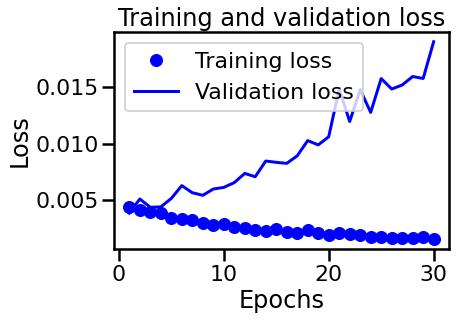

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

After looking at accuracy scores for the validation data (0.5568) and the test data (0.5710), we can see the neural network model performs well.

In [ ]:
# creating the dataframe 
y_pred = pd.DataFrame(data = y_pred, 
                      columns = ['rating_1','rating_2','rating_3','rating_4','rating_5']) 

## 5.11 Test Confusion Matrix

In order to create a confusion matrix, I have to reverse one hot encode the scores column and adjust the index for 0-4 back to 1-5.

## 5.11.1 Reverse Encode Target Into One Column for Confusion Matrix

In [ ]:
def reverse_encode(y_df):
  
  y_df['rating'] = (y_df.iloc[:, 0:] == 1).idxmax(1)['rating'] = (y_df.iloc[:, 0:] == 1).idxmax(1)
  for i in range(0,len(y_df)):
    if y_df.iloc[i,-1] == 'rating_1':
      y_df.iloc[i,-1] = 1
    elif y_df.iloc[i,-1] == 'rating_2':
      y_df.iloc[i,-1] = 2
    elif y_df.iloc[i,-1]== 'rating_3':
      y_df.iloc[i,-1] = 3
    elif y_df.iloc[i,-1]== 'rating_4':
      y_df.iloc[i,-1] = 4
    elif y_df.iloc[i,-1] == 'rating_5':
      y_df.iloc[i,-1]= 5  

In [ ]:
reverse_encode(y_val)
y_val.head()

rating_1  rating_2  rating_3  rating_4  rating_5 rating
21413       1.0       0.0       0.0       0.0       0.0      1
13727       0.0       0.0       0.0       1.0       0.0      4
2829        0.0       0.0       0.0       1.0       0.0      4
24588       0.0       0.0       1.0       0.0       0.0      3
14455       0.0       0.0       1.0       0.0       0.0      3

In [ ]:
y_val.rating.unique()

array([1, 4, 3, 2, 5], dtype=object)

### 5.11.2 Saving Neural Network Preprocessed y Data

In [175]:
y_test.to_csv('/content/y_test_nn.csv',index=False)

In [181]:
np.save('/content/x_test_dev',x_test)

In [182]:
np.save('/content/X_test',X_test)

In [180]:
x_test

array([[  12,   17, 2633, ...,    0,    0,    0],
       [ 102,   24,  134, ...,    0,    0,    0],
       [  12,   17,   18, ...,    0,    0,    0],
       ...,
       [ 250,  445,  351, ...,    0,    0,    0],
       [   4,  483,  184, ...,    0,    0,    0],
       [  98,  226,   24, ...,    0,    0,    0]], dtype=int32)

## 5.12 Saving Model


In [171]:
model.save('/content/NN_SOTA.h5')

In [172]:
pickle.dump(word_index_dict,open('/content/word_index_dict_SOTA.pkl','wb'))